Wahlpflichtfach Künstliche Intelligenz II: Testat 

---

# 02 - Testat zu Tensorflow (Klassifikation)
__Gruppennummer:__ 1

__Mitglieder:__
- Lena Awe
- Leni Lakebrink
- Jannes Teupen
- Lucas Weihermann
- Jakob Zoll


In [20]:
%matplotlib inline

## Data Understanding
Laden Sie die Daten und machen Sie sich mit ihnen vertraut. Den Datensatz finden Sie unter folgendem [Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset).

In [21]:
import pandas as pd

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
# import seaborn as sns
# 
# sns.set_theme(style="whitegrid")
# sns.pairplot(df, hue="target")

## Data Preperation (2 Punkte)
Die erste Aufgabe ist es den Datensatz fürs maschinelle Lernen vorzubereiten. Dazu sind die folgenden Schritte nötig:
* a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte und anschließenden skalieren dieser
* b) Erstellen der Preparation-Pipeline

_Hinweise/Tipps:_
* Sie müssen die unterschiedlichen Algorithmen nicht (bis zum Maximum) optimieren, hier geht es gerade eher darum zu überprüfen, ob Sie die Algorithmen generell verstanden haben und Sie richtig einsetzen/kombinieren können.
* Gucken Sie sich nochmal die besprochenen Algorithmen aus dem Praktikum 1 an und überlegen wo die Stärken und Schwächen liegen.
* Sie können selbstverständlich auch unterschiedliche Methoden für die einzelnen Merkmale wählen.


### a) Auswahl der Strategie(n)
_Punkte: 1_

Als erstes müssen Sie sich eine Strategie zum Ersetzen der fehlenden Werte überlegen. Beschreiben Sie diese in der nachfolgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie gewählt haben. Außerdem sollten die Daten skaliert/normalisiert werden. Beschreiben Sie Ihre Strategie und begründen Sie, warum Sie diese Strategie bzw. Methoden gewählt haben. Erstellen sie zusätzlich einen Test und Trainingsdatensatz

**Ihre Antwort:**

Da es hier ebenfalls keine fehlenden Werte gibt, müssen keine Werte ersetzt werden. Wenn es fehlende Werte gegeben hätte, hätten wir diese auch mit dem IterativeImputer ersetzt.

Für die Skalierung der Werte nutzen wir einen RobustScaler, damit Ausreißer die Ergebnisse nicht zu stark beeinflussen. Damit skalieren wir alle Werte bis auf Ausreißer auf einen Wertebreich von -1 bis 1. Alle Spalten bis auf die Zielvariable werden skaliert, da nur metrische Variablen vorliegen. 

Da wir nur die Skalierung verwenden, wird keine Pipeline benötigt. 

### b) Erstellen der Preparation-Pipeline
_Punkte: 1_

In [23]:
from sklearn.preprocessing import RobustScaler
import torch

data_scaled = RobustScaler().fit_transform(df.loc[:, :'worst fractal dimension'])
target = df['target']

n = len(data_scaled)
input_dim = data_scaled.shape[1]
x = torch.tensor(data_scaled, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.long) # Float ausprobieren und target.values 

## Modeling (3 Punkte)
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
* a) Erstellen sie ein Multilayer Perceptron
* b) Entscheiden sie sich für eine Loss-Funktion, Optimierer und geeignete Metriken. Zusätzlich erstellen sie ein Tensorboard.
* c) Trainieren sie das neuronale Netz

### a) Erstellen sie ein Multilayer Perceptron
_Punkte: 1,5_

Denken sie an die Initialisierung der Gewichte im Layer sowie die Wahl der Aktivierungsfunktion


In [24]:
from datetime import datetime

from torch.utils.data import TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir=f'./data/02_testat_nn/runs/run_{datetime.now().strftime("%Y%m%d-%H%M%S")}')

ids = torch.randperm(len(x))
train_ids = ids[:int(n * .6)]
val_ids = ids[int(n * .6):int(n * .8)]
test_ids = ids[int(n * .8):]

train_dataset = TensorDataset(x[train_ids], y[train_ids])
val_dataset = TensorDataset(x[val_ids], y[val_ids])
test_dataset = TensorDataset(x[test_ids], y[test_ids])

batch_size = 32
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True  # Shuffle training data each epoch
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False  # Don't shuffle validation
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False  # Don't shuffle test
)

print(f"Training batches per epoch: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Training batches per epoch: 11
Validation batches: 4
Test batches: 4


In [25]:
import torch.nn as nn
import torch.nn.functional as F

class ClassificationMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

model = ClassificationMLP(input_dim=input_dim, output_dim=2)

# Log the model architecture to TensorBoard
writer.add_graph(model, x[train_ids][:batch_size])

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Model Architecture:")
print(model)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


Model Architecture:
ClassificationMLP(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)

Total parameters: 4,130
Trainable parameters: 4,130


### b) Loss-Funktion, Optimierer und Metriken
_Punkte: 1_

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # sollen wir standardmäßig als Optimizer verwenden
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min',      # Reduce LR when validation loss stops decreasing
    factor=0.5,      # Multiply LR by 0.5
    patience=10,     # Wait 10 epochs before reducing
)

def train_epoch(model, train_loader, criterion, optimizer):
    """Train for one epoch"""
    model.train()  # Set model to training mode
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_X.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)
    
    avg_loss = train_loss / len(train_loader.dataset)
    accuracy = correct / total
    return avg_loss, accuracy

def evaluate(model, val_loader, criterion):
    """Evaluate the model"""
    model.eval()  # Set model to evaluation mode
    eval_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disable gradient computation for efficiency
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            eval_loss += loss.item() * batch_X.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    avg_loss = eval_loss / len(val_loader.dataset)
    accuracy = correct / total
    
    return avg_loss, accuracy

def compute_metrics(model, data_loader):
    """Compute detailed classification metrics"""
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for batch_X, batch_y in data_loader:
            outputs = model(batch_X)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_targets.extend(batch_y.numpy())
            
    return {
        'accuracy': accuracy_score(all_targets, all_predictions),
        'precision': precision_score(all_targets, all_predictions, zero_division=0),
        'recall': recall_score(all_targets, all_predictions, zero_division=0),
        'f1': f1_score(all_targets, all_predictions, zero_division=0)
    }

#### c) Trainieren des neuronale Netz
_Punkte: 0,5_

In [27]:
# Training loop
num_epochs = 100
train_losses = []
avg_losses = []
best_val_loss = float('inf')
patience_counter = 0
early_stopping_patience = 20

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)

    # Validate
    avg_loss, eval_acc = evaluate(model, val_loader, criterion)
    avg_losses.append(avg_loss)

    # Log losses to TensorBoard
    writer.add_scalar('Loss/Train', train_loss, epoch)
    writer.add_scalar('Loss/Validation', avg_loss, epoch)
    writer.add_scalars('Loss/Train_vs_Val', {'Train': train_loss, 'Validation': avg_loss}, epoch)
    writer.add_scalar('Accuracy/Train', train_acc, epoch)
    writer.add_scalar('Accuracy/Validation', eval_acc, epoch)

    # Update learning rate based on validation loss
    scheduler.step(avg_loss)

    # Early stopping check
    if avg_loss < best_val_loss:
        best_val_loss = avg_loss
        patience_counter = 0

        torch.save(model.state_dict(), './data/02_testat_nn/model.pth')  # Save best model
    else:
        patience_counter += 1

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}/{num_epochs} | "
              f"Train Loss: {train_loss:7.4f} | "
              f"Val Loss: {avg_loss:7.4f} | "
              f"Accuracy: {eval_acc:.4f} | "
              f"LR: {optimizer.param_groups[0]['lr']:.6f}")
        
    if patience_counter >= early_stopping_patience:
        print(f"\nEarly stopping triggered after {epoch+1} epochs")
        break

writer.close()

Epoch   1/100 | Train Loss:  0.6351 | Val Loss:  0.5389 | Accuracy: 0.9561 | LR: 0.001000


Epoch  10/100 | Train Loss:  0.0674 | Val Loss:  0.0850 | Accuracy: 0.9649 | LR: 0.001000
Epoch  20/100 | Train Loss:  0.0354 | Val Loss:  0.1092 | Accuracy: 0.9561 | LR: 0.000500

Early stopping triggered after 29 epochs


## Evaluation (2 Punkte)
Verwenden sie die Metriken sowie für das Problem geeignete Visualisierungen und erläutern sie ihre Ergebnisse.

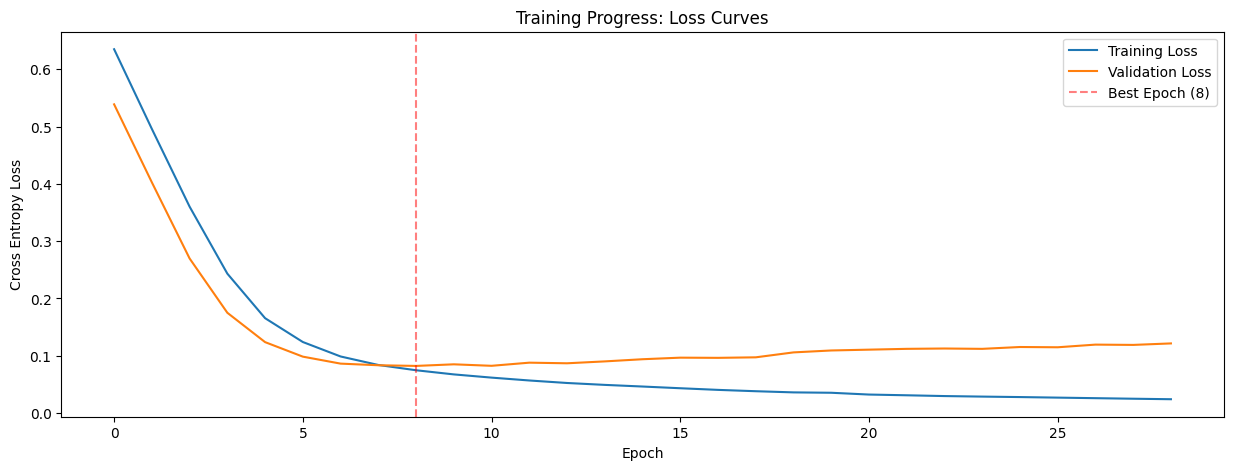

Accuracy:  0.9737
Precision: 0.9851
Recall:    0.9706
F1-Score:  0.9778


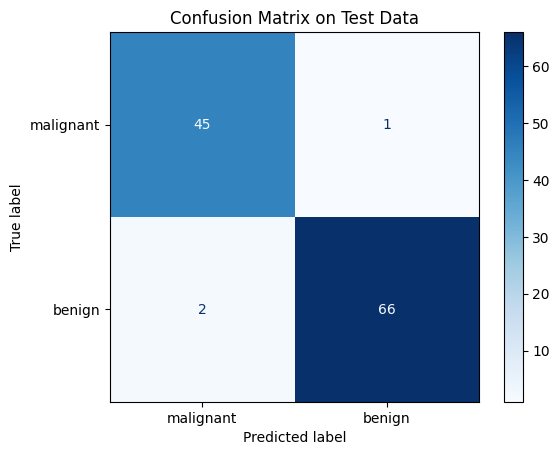

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Loss-Plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train_losses, label='Training Loss')
ax.plot(avg_losses, label='Validation Loss') # Korrigiert von val_losses zu avg_losses
ax.set(xlabel='Epoch', ylabel='Cross Entropy Loss', title='Training Progress: Loss Curves')

best_epoch = np.argmin(avg_losses)
ax.axvline(x=best_epoch, color='red', linestyle='--', alpha=0.5, label=f'Best Epoch ({best_epoch})')
ax.legend()
plt.show()

# Metriken ausgeben
model.load_state_dict(torch.load('./data/02_testat_nn/model.pth'))
test_metrics = compute_metrics(model, test_loader)

print(f"Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall:    {test_metrics['recall']:.4f}")
print(f"F1-Score:  {test_metrics['f1']:.4f}")

# Confusion Matrix visualisieren
y_true = y[test_ids].numpy()
outputs = model(x[test_ids])
_, y_pred = torch.max(outputs, 1)

ConfusionMatrixDisplay.from_predictions(
    y_true, 
    y_pred.numpy(), 
    cmap='Blues',
    display_labels=data.target_names
)
plt.title('Confusion Matrix on Test Data')
plt.show()

## Ensemble Learning (3 Punkte)

Erstellen sie ein Ensemble Modell aus ihrem bisherigen sowie mindestens einem weiteren Modell. Entscheiden sie sich für einen geeigneten Layer zum Verbinden der Modell. Anschließend sollen Sie das beste Modell erneut evaluieren und die Veränderung zum vorherigen Begründen.
* a) Ensemble erstellen
* b) Evaluation

### Ensemble erstellen
_Punkte: 2_

In [ ]:
# Wir sollen die Hyperparamter/Parameter beim Ensemble Learning in einer Tabelle im Paper abbilden
 


### Evaluation
_Punkte: 1_

Erläutern sie den unterschied zwischen den beiden Modellen und den Einfluss auf die von Ihnen gemessenen Werte

**Ihre Antwort:**

---

Wahlpflichtach Künstliche Intelligenz II: Testat 